In [1]:
import torch
from pytorch_pretrained_gans import make_gan
#from pytorch_pretrained_gans_ import make_gan
import matplotlib.pyplot as plt
import heapq
import numpy as np

# Sample a class-conditional image from BigGAN with default resolution 256



In [2]:
def indices_of_n_largest(ls, n):
    if not ls or n <= 0:
        return []
    largest_n = heapq.nlargest(n, enumerate(ls), key=lambda x: x[1])
    indices = [i for i, v in largest_n]
    return indices

In [3]:
G = make_gan(gan_type='biggan')  # -> nn.Module

Loading BigGAN model biggan-deep-256 from cache at C:\Users\lucas\.pytorch_pretrained_biggan\e7d036ee69a83e83503c46902552573b27d856eaf6b8b84252a63a715dce7501.aec5caf3e5c5252b8857d6bb8adefa8d1d6092a8ba6c9aaed1e6678f8a46be43


In [11]:
y = G.sample_class(batch_size=1)  # -> torch.Size([1, 1000])
z = G.sample_latent(batch_size=1)  # -> torch.Size([1, 128])
print(z)
x = G(z=z, y=y)  # -> torch.Size([1, 3, 256, 256])

tensor([[-0.6463,  0.1191, -0.1637,  0.0731,  0.1495, -0.1653, -0.0012,  0.4954,
         -0.3159, -0.3825,  0.1343,  0.1985, -0.0258, -0.0395,  0.2246,  0.6417,
         -0.4759,  0.4061,  0.4395,  0.3225,  0.0679,  0.4825, -0.5396,  0.3176,
          0.0666, -0.0564, -0.0299,  0.3289, -0.5255, -0.2174, -0.7237,  0.1314,
         -0.0977, -0.2451, -0.6410, -0.4396,  0.2075,  0.4979,  0.4005, -0.0626,
          0.2882, -0.6978,  0.1629,  0.0761, -0.7712,  0.6007, -0.5876, -0.6980,
         -0.3813,  0.0601, -0.0708, -0.0650,  0.0986,  0.2062,  0.7965,  0.5748,
          0.3337, -0.1059,  0.2375, -0.1662, -0.1444, -0.3337,  0.2366,  0.0662,
         -0.0370, -0.0014,  0.2797, -0.0541,  0.3434,  0.1936,  0.0334,  0.2886,
         -0.1838,  0.7173,  0.1444,  0.1293,  0.2431, -0.4026,  0.3642,  0.7331,
          0.7679, -0.0860,  0.2358, -0.1477,  0.3999,  0.4753,  0.0876,  0.1677,
          0.5660,  0.1784,  0.1681, -0.1508, -0.4604,  0.0526,  0.1768, -0.7591,
          0.1545,  0.2554, -

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


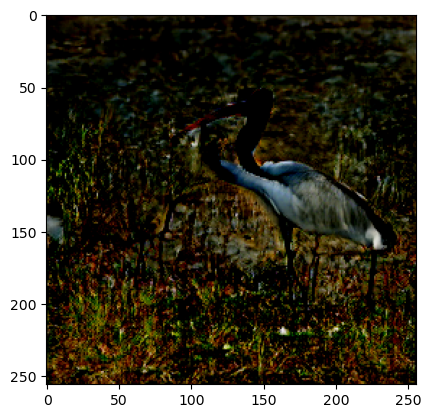

In [5]:
x_img = x[0].detach().cpu().numpy().transpose(1, 2, 0)
plt.imshow(x_img)

In [6]:
G

GeneratorWrapper(
  (G): BigGAN(
    (embeddings): Linear(in_features=1000, out_features=128, bias=False)
    (generator): Generator(
      (gen_z): Linear(in_features=256, out_features=32768, bias=True)
      (layers): ModuleList(
        (0): GenBlock(
          (bn_0): BigGANBatchNorm(
            (scale): Linear(in_features=256, out_features=2048, bias=False)
            (offset): Linear(in_features=256, out_features=2048, bias=False)
          )
          (conv_0): Conv2d(2048, 512, kernel_size=(1, 1), stride=(1, 1))
          (bn_1): BigGANBatchNorm(
            (scale): Linear(in_features=256, out_features=512, bias=False)
            (offset): Linear(in_features=256, out_features=512, bias=False)
          )
          (conv_1): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (bn_2): BigGANBatchNorm(
            (scale): Linear(in_features=256, out_features=512, bias=False)
            (offset): Linear(in_features=256, out_features=512, bias=False)


In [7]:
weights = G.G.generator.conv_to_rgb.weight
weights.shape
#weights[0,0,:,:]

torch.Size([128, 128, 3, 3])

In [8]:
weights_norm = np.zeros((weights.shape[0],weights.shape[1]))
weights_norm_abs = np.zeros((weights.shape[0],weights.shape[1]))
for i in range(weights.shape[0]):
    for j in range(weights.shape[1]):
        v = 0
        v_abs = 0
        t = weights[i,j,:,:].detach().numpy()
        for k in range(t.shape[0]):
            for l in range(t.shape[1]):
                v += (t[k,l])
                v_abs += abs(t[k,l])
        weights_norm[i,j] = v
        weights_norm_abs[i,j] = v_abs

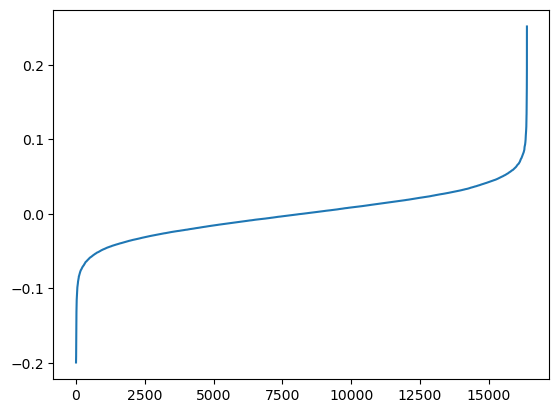

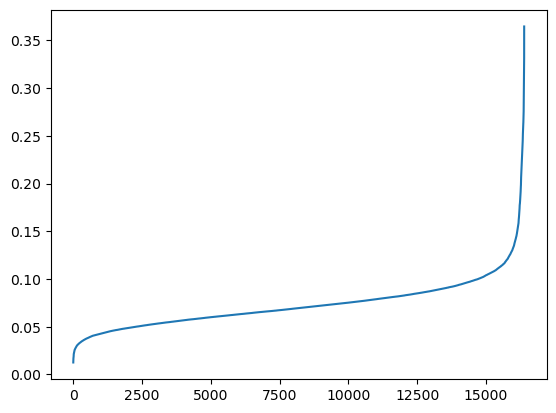

In [9]:
flat_weights = weights_norm.flatten()
flat_weights.sort()
plt.plot(flat_weights)
plt.show()
flat_weights_abs = weights_norm_abs.flatten()
flat_weights_abs.sort()
plt.plot(flat_weights_abs)
plt.show()

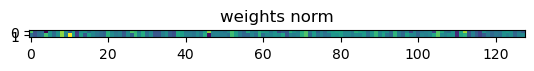

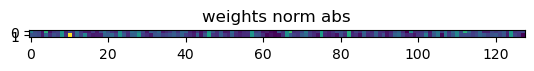

In [10]:

plt.imshow(weights_norm[:2], cmap='viridis', interpolation='none')
plt.title('weights norm')
plt.show()
plt.imshow(weights_norm_abs[:2], cmap='viridis', interpolation='none')
plt.title('weights norm abs')
plt.show()